---
layout: default
title: "Neural Networks - Cost Function"
categories: neuralNetwork
permalink: /ML12/
order: 12
comments: true
---

In [2]:
%pylab --no-import-all inline
from plot_ann import ann

Populating the interactive namespace from numpy and matplotlib


# Neural Network Cost function
Suppose we have a classification problem and we are training a neural network like that shown in the picture with $L$ number of layers and $s_l$ no of units in layer $l$; suppose we have a training set $\left \lbrace  (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(m)}, y^{(m)}) \right \rbrace$.

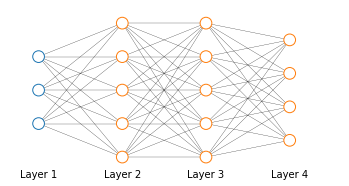

In [6]:
ax, *_ = ann([3, 5, 5, 4], node_colors=True, layer_labels=True, width=2)
ax.set_aspect('equal');

We are going to consider two kind of classification problems

* Binary classification: 

$$y \in \mathbb{R};\quad S_L=1;\quad K=1$$

* Multi-class classification (for K classes)

$$y \in \mathbb{R}^K;\quad S_L=K;\quad K \geq 3$$

Whereas the cost function for logistic regression $\eqref{eq:logregcost}$ is

$$
\begin{equation}
J(W)=-\frac{1}{m}\left[\sum^m_{i=1}y^{(i)}\log \hat{y}^{(i)} +\left(1-y^{(i)}\right)\log\left(1-\hat{y}^{(i)}\right)\right] +\frac{\lambda}{2m}\sum_{j=1}^nW_j^2
\end{equation}
\label{eq:logregcost} \tag{1}
$$

The cost function for a neural network $\eqref{eq:neuralnetcost}$ is a generalization where instead of having one output $y^{(i)}$ we have $K$ of them and the regularization term sums over all values of $W_{ji}^{(l)}$

$$
\begin{align}
J(W)=&-\frac{1}{m}\left[\sum^m_{i=1}\sum^K_{k=1}y_k^{(i)}\log \hat{y}^{(i)}_k+\left(1-y_k^{(i)}\right)\log\left(1-\hat{y}^{(i)}_k\right)\right] \\
&+\frac{\lambda}{2m} \sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_{l+1}}\left(W_{ji}^{(l)}\right)^2
\end{align}
\label{eq:neuralnetcost} \tag{2}
$$

* the double sum simply adds up the logistic regression costs calculated for each unit in the output layer
* the triple sum simply adds up the squares of all the individual $W$s in the entire network.
* the $i$ in the triple sum does not refer to training example $i$

# Activation function
Until now we used the sigmoid activation (<a href="#fig:activfuncs">figure below</a>, panel A) function but you can use different activation functions that affect the output.

## Different types of activation functions
A function that almost always works better than the sigmoid function is the hyperbolic tangent function (<a href="#fig:activfuncs">figure below</a>, panel B), which is a shifted and scaled version of the sigmoid function. The reason it works better than the sigmoid function is that, being centered on 0, the mean of the activation values in the hidden units of a layer is close to 0 and this makes the learning process easier for the next layer. This is always valid with the exception of the output layer.

One of the drawbacks of both the sigmoid function and the hyperbolic tangent function is that for extreme values of $z$, the derivatives are $\approx 0$ (the slope of the function is close to 0) and this can slow down gradient descent. 

A popular choice to avoid this problem is the Rectified Linear Unit (ReLU) (<a href="#fig:activfuncs">figure below</a>, panel C). The derivative of the ReLU is 1 for $z>1$ and 0 for $z < 0$ (for $z=0$ the derivative is undefined). The ReLU is the most popular choice when it comes to activation function.

Since the derivative of the ReLU is 0 for $z<0$, sometimes an alternative version, called the leaky ReLU is used (<a href="#fig:activfuncs">figure below</a>, panel D), but it is not as common as the ReLU.

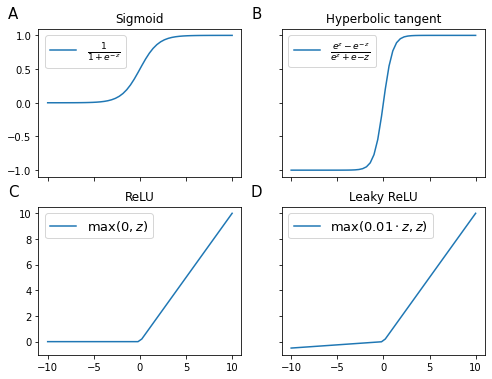

In [8]:
z = np.linspace(-10,10)
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(8, 6), sharey='row')
ax1, ax2, ax3, ax4 = axes.ravel()
s = 1/(1+np.exp(-z))
ax1.plot(z, s, label=r"$\frac{1}{1+e^{-z}}$")
ax1.set_title('Sigmoid')
ax2.plot(z, np.tanh(z), label=r'$\frac{e^z-e^{-z}}{e^z+e{-z}}$')
ax2.set_title('Hyperbolic tangent')
ax3.plot(z, np.maximum(0, z), label=r'$\max(0, z)$')
ax3.set_title('ReLU')
ax4.plot(z, np.maximum(0.05*z, z), label=r'$\max(0.01 \cdot z, z)$')
ax4.set_title('Leaky ReLU')

for ax, l in zip(axes.ravel(), ['A', 'B', 'C', 'D']):
    ax.legend(fontsize=13)
    ax.text(-0.1, 1.15, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')

<i id="fig:activfuncs">Four activation functions in the range (-10, 10): (A) the sigmoid function, (B) the hyperbolic tangent function, (C) the Rectified Linear Unit (ReLU) function and (D) the leaky ReLU.</i>

The advantage of ReLU and leaky ReLU is that for most of the $z$ space, their derivative is far from 0 and this means that the learning speed will be much faster than with other functions. While it is true that the derivative of the ReLU is 0 for $z<0$, most of the hidden units will have $z>0$.

## Why non-linear activation functions
Why not set $z = a$ (a situation sometimes called a linear activation function)? If the activation function is linear the neural network will only be able to build linear models no matter how many hidden layers there are.

As a matter of fact it can be demonstrated that a neural network with 1 hidden layer with linear activation functions (<a href="#fig:linann">figure below</a>, panel A), it is not more expressive than a logistic regression algorithm.

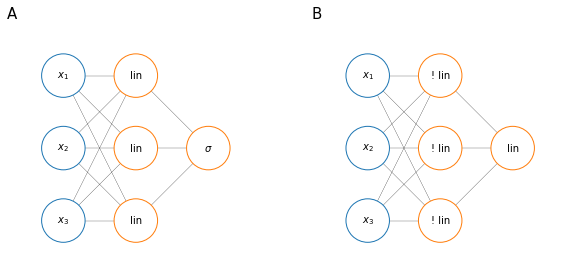

In [4]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 4))
ann([3, 3, 1], node_labels=['$x_1$','$x_2$', '$x_3$', 'lin', 'lin', 'lin', '$\\sigma$'], radius=3, node_colors=True, ax=ax1)
ax1.set_aspect('equal')
ax1.text(-0.1, 1.15, 'A', transform=ax1.transAxes, fontsize=15, va='top', ha='right')
ann([3, 3, 1], node_labels=['$x_1$','$x_2$', '$x_3$', '! lin', '! lin', '! lin', 'lin'], radius=3, node_colors=True, ax=ax2)
ax2.set_aspect('equal')
ax2.text(-0.1, 1.15, 'B', transform=ax2.transAxes, fontsize=15, va='top', ha='right');

<i id="fig:linann">A neural network with one hidden layer in which the hidden units have linear activation functions; not more expressive than a logistic regression model.</i>

There is a case in which having a linear activation function in the output layer might be useful: when using a neural network for a regression problem, where $y \in \mathbb{R}$. But in that case the hidden units should have non-linear activation functions (<a href="#fig:linann">figure above</a>, panel B).

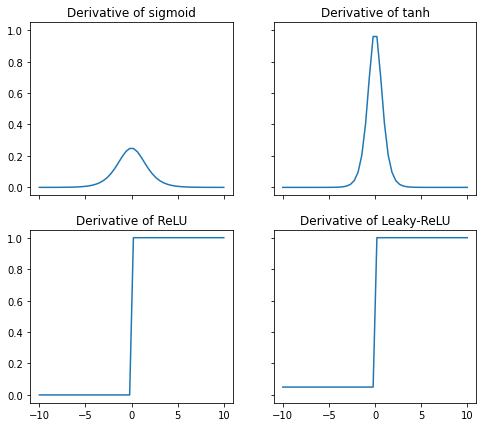

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(8, 7), sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = axes.ravel()

ax1.plot(z, s*(1-s))
ax1.set_title('Derivative of sigmoid')

ax2.plot(z, 1-np.tanh(z)**2)
ax2.set_title('Derivative of tanh')

ax3.plot(z, np.where(z >= 0, 1, 0))
ax3.set_title('Derivative of ReLU')

ax4.plot(z, np.where(z >= 0, 1, 0.05))
ax4.set_title('Derivative of Leaky-ReLU');